# **&#9776; DESAFIO VI**
---

# **:: Estrutura da Base de Dados**

### A base fictícia conterá 150 instâncias com as seguintes variáveis:


**ID_Registro** – Identificador único

**Tipo_Eletronico** – Categoria do item (celular, computador, TV, bateria, etc.)

**Ano_Fabricacao** – Ano de fabricação do dispositivo

**Origem** – Origem do descarte (urbana, rural, industrial, governamental)

**Destino_Final** – Local de descarte (cooperativa, lixão, reciclagem formal, rio, aterro controlado)

**Peso_kg** – Peso aproximado do equipamento

**Nivel_Toxico** – Grau de toxicidade (baixo, médio, alto, crítico)

**Custo_Reciclagem_R$** – Estimativa de custo de reciclagem


Este notebook tem como objetivo realizar uma análise exploratória e descritiva do dataset `desafio6_lixo_eletronico.csv`, contendo informações sobre descarte de resíduos eletrônicos.


---

# **:: Base de Dados**

<h4 align="justify">O dataset está disponível para download através do link a seguir:</h4>
<h4 align="justify"><a DOWNLOAD href="https://drive.google.com/file/d/1mZI1yIT5yJUpw-TWi7du3NfOoaSdT7rt/view?usp=drive_link" target="_blank" download="desafio6_lixo_eletronico.csv">desafio6_lixo_eletronico.csv</a></h4>

## 1. Exploração Inicial dos Dados

1. Carregue a base "desafio6_lixo_eletronico.csv" em um DataFrame do Pandas
2. Faça uma análise exploratória (shape, tipos de variáveis, estatísticas descritivas) 
3. Apresente o total de valores ausentes e duplicados
### 1.1 Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leiura dos dados
path='/home/akel/PycharmProjects/I2A2/data/raw/'
file='desafio6_lixo_eletronico.csv'
dfo = pd.read_csv(path+file)
dfo = dfo.rename(columns={'Custo_Reciclagem_R$': 'Custo_Reciclagem'})
display(dfo.head())

,ID_Registro,Tipo_Eletronico,Ano_Fabricacao,Origem,Destino_Final,Peso_kg,Nivel_Toxico,Custo_Reciclagem,Municipio,Educacao_Ambiental,Data_Descarte
0,1,Impressora,2006,Urbana,Aterro Controlado,30.95,Alto,122.38,Marabá,Não,2022-09-02 11:26:10.469798656
1,2,Bateria,2002,Urbana,Aterro Controlado,16.89,Alto,48.65,Novo Progresso,Sim,2023-03-03 01:17:18.926174496
2,3,Geladeira,2016,Governamental,Cooperativa,32.82,Baixo,165.25,Tucuruí,Sim,2021-08-09 09:10:52.348993280
3,4,Impressora,2021,Governamental,Reciclagem Formal,19.33,Baixo,72.29,Cametá,Não,2018-04-08 05:18:55.570469792
4,5,TV,1997,Industrial,Lixão,34.11,Baixo,72.79,Ananindeua,Não,2021-12-17 01:55:58.389261728


### 1.2 Analise exploratoria 

In [2]:
df=dfo.copy()

print("=" * 50)
print("ANÁLISE EXPLORATÓRIA DO DATAFRAME")
print("=" * 50)
# Informações sobre o shape dos dados
print(f"\n📊 DIMENSÕES: {df.shape[0]} linhas × {df.shape[1]} colunas")

# Informações sobre tipos de dados
print(f"\n🔧 TIPOS DE DADOS:")
print(df.dtypes.to_frame('Tipo').to_markdown())

# Estatísticas numéricas
numericas = df.select_dtypes(include=['int64', 'float64'])
if not numericas.empty:
    # Obter estatísticas descritivas
    descricao = numericas.describe()
    
    # Adicionar linha de valores nulos
    valores_nulos = numericas.isnull().sum()
    descricao.loc['null'] = valores_nulos
    print(f"\n📈 ESTATÍSTICAS NUMÉRICAS:")

    print(descricao.to_markdown())
else:
    print("❌ Nenhuma variável numérica encontrada")


colunas_categoricas = [
    'Tipo_Eletronico', 
    'Origem', 
    'Destino_Final', 
    'Nivel_Toxico', 
    'Educacao_Ambiental'
]

# Estatísticas categórica
print(f"\n📊 ESTATÍSTICAS CATEGÓRICAS:")
resumo_categoricas = []
for coluna in colunas_categoricas:
    num_unicos = df[coluna].nunique()
    valores = df[coluna].value_counts().head(3)
    top_valores = ", ".join([f"{k} ({v})" for k, v in valores.items()])    
    resumo_categoricas.append({
        'Variável': coluna,
        'Valores Únicos': num_unicos,
        'Top 3 Valores': top_valores,
        'Valores Nulos': df[coluna].isnull().sum()  })
resumo_df = pd.DataFrame(resumo_categoricas)
print(resumo_df.to_markdown(index=False))
print('\n')

# Contagem de Duplicatas
duplicatas = df.duplicated().sum()
print("=" * 50)
print("🔍 VERIFICAÇÃO DE DUPLICATAS")
print(f"Total de linhas duplicadas: {duplicatas}")
print("=" * 50)

print('\n')

# Contagem de Nulos
print("🔍VERIFICAÇÃO DE VALORES NULOS:")
print(f" Total de valores nulos: {df.isnull().sum().sum()}")
print("=" * 50)
print("  NULOS POR COLUNA:")
print("=" * 50)
nulos_por_coluna = df.isnull().sum()
#nulos_por_coluna = nulos_por_coluna[nulos_por_coluna > 0]  # Mostra apenas colunas com nulos

#if len(nulos_por_coluna) > 0:
print(nulos_por_coluna.to_frame('Quantidade de Nulos').to_markdown())
print("=" * 50)
print("=" * 50)

ANÁLISE EXPLORATÓRIA DO DATAFRAME

📊 DIMENSÕES: 150 linhas × 11 colunas

🔧 TIPOS DE DADOS:
|                    | Tipo    |
|:-------------------|:--------|
| ID_Registro        | int64   |
| Tipo_Eletronico    | object  |
| Ano_Fabricacao     | int64   |
| Origem             | object  |
| Destino_Final      | object  |
| Peso_kg            | float64 |
| Nivel_Toxico       | object  |
| Custo_Reciclagem   | float64 |
| Municipio          | object  |
| Educacao_Ambiental | object  |
| Data_Descarte      | object  |

📈 ESTATÍSTICAS NUMÉRICAS:
|       |   ID_Registro |   Ano_Fabricacao |   Peso_kg |   Custo_Reciclagem |
|:------|--------------:|-----------------:|----------:|-------------------:|
| count |      150      |        150       |  135      |           135      |
| mean  |       72.7333 |       2008.65    |   25.5156 |           103.103  |
| std   |       43.1634 |          8.83338 |   13.9163 |            56.2429 |
| min   |        1      |       1995       |    1.71   |       

## 2. Limpeza e Padronização
1. Identifique e trate valores inconsistentes (ex.: "reciclagem formal" e "Reciclagem Formal")
2. Corrija erros de digitação e padronize todas as colunas categóricas.
3. Elimine duplicatas mantendo apenas registros válidos.

### a) Variaveis Categóricas
* As variaveis foram convertidades para minusculas;
* A designação **'NaN'** foi substituido por **"Desconhecido"** a fim de preservar a informação;
* O Valor especifico **urbana** for trocado por **urbano**

In [3]:
# Padronização de variaveis categoricas
colunas_categoricas = [
    'Tipo_Eletronico', 
    'Origem', 
    'Destino_Final', 
    'Nivel_Toxico', 
    'Educacao_Ambiental'
]

# Converter todas as colunas para minúsculas
for coluna in colunas_categoricas:
    df[coluna] = df[coluna].str.lower()
    
# transformando valores nulos e desconhecido
for coluna in colunas_categoricas[:3]:  
    df[coluna] = df[coluna].fillna("desconhecido")

# Correção valores específicos
df['Origem'] = df['Origem'].replace({'urbana': 'urbano'})


print(f"\n{'='*60}")
print("📊 VALORES ÚNICOS APÓS PADRONIZAÇÃO")
print(f"{'='*60}")

for coluna in colunas_categoricas:
    print(f"\n🎯 {coluna}:")
    print(f"   Valores únicos: {df[coluna].nunique()}")
    print(f"   Valores: {df[coluna].unique()}")



📊 VALORES ÚNICOS APÓS PADRONIZAÇÃO

🎯 Tipo_Eletronico:
   Valores únicos: 8
   Valores: ['impressora' 'bateria' 'geladeira' 'tv' 'desconhecido' 'computador'
 'celular' 'tablet']

🎯 Origem:
   Valores únicos: 5
   Valores: ['urbano' 'governamental' 'industrial' 'rural' 'desconhecido']

🎯 Destino_Final:
   Valores únicos: 6
   Valores: ['aterro controlado' 'cooperativa' 'reciclagem formal' 'lixão'
 'desconhecido' 'rio']

🎯 Nivel_Toxico:
   Valores únicos: 4
   Valores: ['alto' 'baixo' 'médio' 'crítico']

🎯 Educacao_Ambiental:
   Valores únicos: 2
   Valores: ['não' 'sim']


### b) Variaveis Númericas
Para as variaveis **númericas** (***Peso_kg*** e ***Custo_Reciclagem***) avaliamos as estatisticas descritivas e notamos que média e médiana são muito proximos, indicando dados quase simétricos. Desta forma, uma abordagem simples e direta é a **atribuição da mediana para os dados NaN**, por garantir 
a preservação dos dados e ser menos sensivel a outliers que a média.

comentar sobre mudanças nos valores.

In [4]:
# Variaveis Numéricas
colunas_numericas=['Peso_kg','Custo_Reciclagem']
for coluna in colunas_numericas:
    df[coluna] = df[coluna].fillna(df[coluna].median())

# Estatísticas numéricas
numericas = df.select_dtypes(include=['int64', 'float64'])
descricao = numericas.describe()
print(f"\n📈 ESTATÍSTICAS NUMÉRICAS 2:")
print(descricao.to_markdown())

# Detalhamento de nulos por coluna
print("=" * 50)
print("  NULOS POR COLUNA:")
print("=" * 50)
nulos_por_coluna = df.isnull().sum()
nulos_por_coluna = df.isnull().sum()
#nulos_por_coluna = nulos_por_coluna[nulos_por_coluna > 0]  # Mostra apenas colunas com nulos

#if len(nulos_por_coluna) > 0:
print(nulos_por_coluna.to_frame('Quantidade de Nulos').to_markdown())
print("=" * 50)
print("🔍 VERIFICAÇÃO DE DUPLICATAS")
duplicatas = df.duplicated().sum()
print(f"Total de linhas duplicadas: {duplicatas}")
print("=" * 50)



📈 ESTATÍSTICAS NUMÉRICAS 2:
|       |   ID_Registro |   Ano_Fabricacao |   Peso_kg |   Custo_Reciclagem |
|:------|--------------:|-----------------:|----------:|-------------------:|
| count |      150      |        150       |  150      |           150      |
| mean  |       72.7333 |       2008.65    |   25.382  |           103.663  |
| std   |       43.1634 |          8.83338 |   13.2033 |            53.3635 |
| min   |        1      |       1995       |    1.71   |             5.51   |
| 25%   |       36.25   |       2000.25    |   16.295  |            68.125  |
| 50%   |       70.5    |       2009       |   24.18   |           108.71   |
| 75%   |      109.75   |       2017       |   35.31   |           145.657  |
| max   |      149      |       2022       |   49.8    |           199.46   |
  NULOS POR COLUNA:
|                    |   Quantidade de Nulos |
|:-------------------|----------------------:|
| ID_Registro        |                     0 |
| Tipo_Eletronico    |        

### Discursão
 ```
ANÁLISE COMPARATIVA - ANTES vs DEPOIS DO PREENCHIMENTO
================================================================================
📈 [Peso_kg]:
----------------------------------------
📊 Count:    135 → 150 (+15 valores preenchidos)
📊 Média:    25.516 → 25.382 (Δ-0.134)
📊 Desvio:   13.916 → 13.203 (Δ-0.713)
📊 Q1 (25%): 13.840 → 16.295 (Δ+2.455)
📊 Mediana:  24.180 → 24.180 (Δ+0.000)
📊 Q3 (75%): 36.880 → 35.310 (Δ-1.570)

📈 [Custo_Reciclagem]:
----------------------------------------
📊 Count:    135 → 150 (+15 valores preenchidos)
📊 Média:    103.103 → 103.663 (Δ+0.560)
📊 Desvio:   56.243 → 53.364 (Δ-2.879)
📊 Q1 (25%): 51.845 → 68.125 (Δ+16.280)
📊 Mediana:  108.710 → 108.710 (Δ+0.000)
📊 Q3 (75%): 149.630 → 145.657 (Δ-3.973)

💡 ANÁLISE:
   ✅ Média praticamente inalterada - boa estratégia de preenchimento
   ✅ Redução na dispersão dos dados - valores preenchidos estão próximos da mediana
   ✅ Mediana mantida inalterada - consistência preservada

================================================================================
🎯 CONCLUSÕES GERAIS:
================================================================================
1. 🎯 ESTRATÉGIA DE PREENCHIMENTO:
   • Uso da mediana foi adequado para manter a distribuição
   • Médias praticamente inalteradas (variação < 1%)
   • Medianas mantidas inalteradas - consistência preservada

2. 📊 IMPACTO NA DISTRIBUIÇÃO:
   • Redução no desvio padrão em ambas as colunas
   • Indicativo de que os valores preenchidos estão próximos do centro
   • Quartis sofreram ajustes menores, mas distribuição mantida

3. ✅ QUALIDADE DOS DADOS:
   • Minimizou o impacto nos valores estatísticos principais
   • Preservou a integridade da distribuição original dos dados
```


## 3 – Distribuição e Frequências
Utilize groupby e value_counts para identificar a frequência de cada tipo de eletrônico e de cada origem, apresentando os resultados em tabelas e em gráficos de barras (Matplotlib ou Seaborn)

FREQUÊNCIA DE TIPO DE ELETRÔNICO
                 Frequência  Percentual (%)
Tipo_Eletronico                            
bateria                  25           16.67
celular                  21           14.00
geladeira                20           13.33
computador               20           13.33
impressora               18           12.00
tablet                   17           11.33
desconhecido             15           10.00
tv                       14            9.33




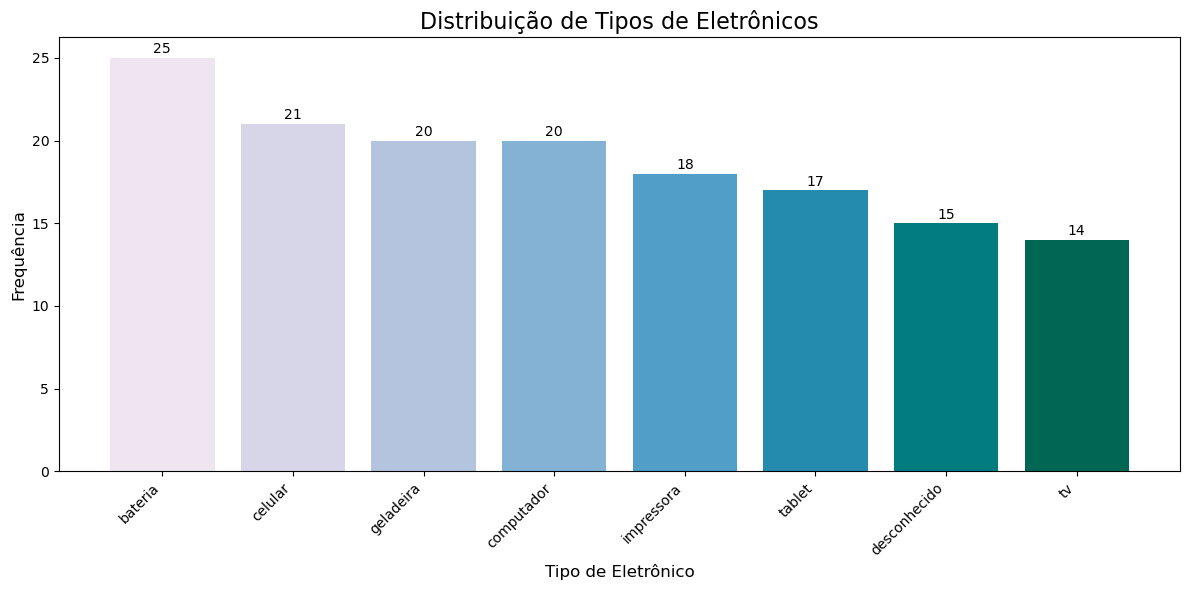

In [5]:
# Distribuição de cada tipo eletrônico
print("=" * 50)
print("FREQUÊNCIA DE TIPO DE ELETRÔNICO")
print("=" * 50)

# Tabela de frequência
freq_tipo = df['Tipo_Eletronico'].value_counts()
freq_tipo_perc = df['Tipo_Eletronico'].value_counts(normalize=True) * 100

tabela_tipo = pd.DataFrame({
    'Frequência': freq_tipo,
    'Percentual (%)': freq_tipo_perc.round(2)
})
print(tabela_tipo)
print("\n")

# Gráfico de barras - Tipo_Eletronico
plt.figure(figsize=(12, 6))
bars = plt.bar(freq_tipo.index, freq_tipo.values, color=sns.color_palette("PuBuGn", len(freq_tipo)))

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height}', ha='center', va='bottom')

plt.title('Distribuição de Tipos de Eletrônicos', fontsize=16)
plt.xlabel('Tipo de Eletrônico', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45, ha='right')
#plt.grid(axis='y', alpha=0.0)
plt.tight_layout()
plt.show()

FREQUÊNCIA DE ORIGEM
               Frequência  Percentual (%)
Origem                                   
governamental          45           30.00
urbano                 35           23.33
industrial             28           18.67
rural                  27           18.00
desconhecido           15           10.00




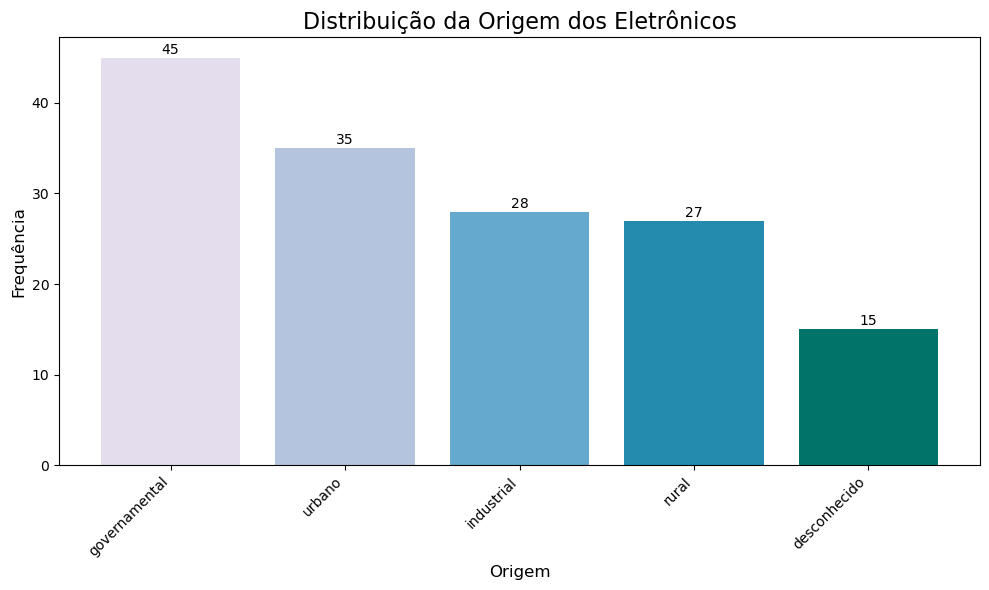

In [6]:
# Origem dos eletronicos
print("=" * 50)
print("FREQUÊNCIA DE ORIGEM")
print("=" * 50)

# Tabela de frequência
freq_origem = df['Origem'].value_counts()
freq_origem_perc = df['Origem'].value_counts(normalize=True) * 100

tabela_origem = pd.DataFrame({
    'Frequência': freq_origem,
    'Percentual (%)': freq_origem_perc.round(2)
})
print(tabela_origem)
print("\n")

# Gráfico de barras - Origem
plt.figure(figsize=(10, 6))
bars = plt.bar(freq_origem.index, freq_origem.values, color=sns.color_palette('PuBuGn', len(freq_origem)))

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height}', ha='center', va='bottom')

plt.title('Distribuição da Origem dos Eletrônicos', fontsize=16)
plt.xlabel('Origem', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ANÁLISE CRUZADA - TIPO x ORIGEM
Tabela de Contingência:
Origem           desconhecido  governamental  industrial  rural  urbano
Tipo_Eletronico                                                        
bateria                     1              9           4      6       5
celular                     0              6           4      3       8
computador                  4              5           4      3       4
desconhecido                0              2           3      2       8
geladeira                   3             10           3      3       1
impressora                  5              4           1      5       3
tablet                      1              5           6      2       3
tv                          1              4           3      3       3




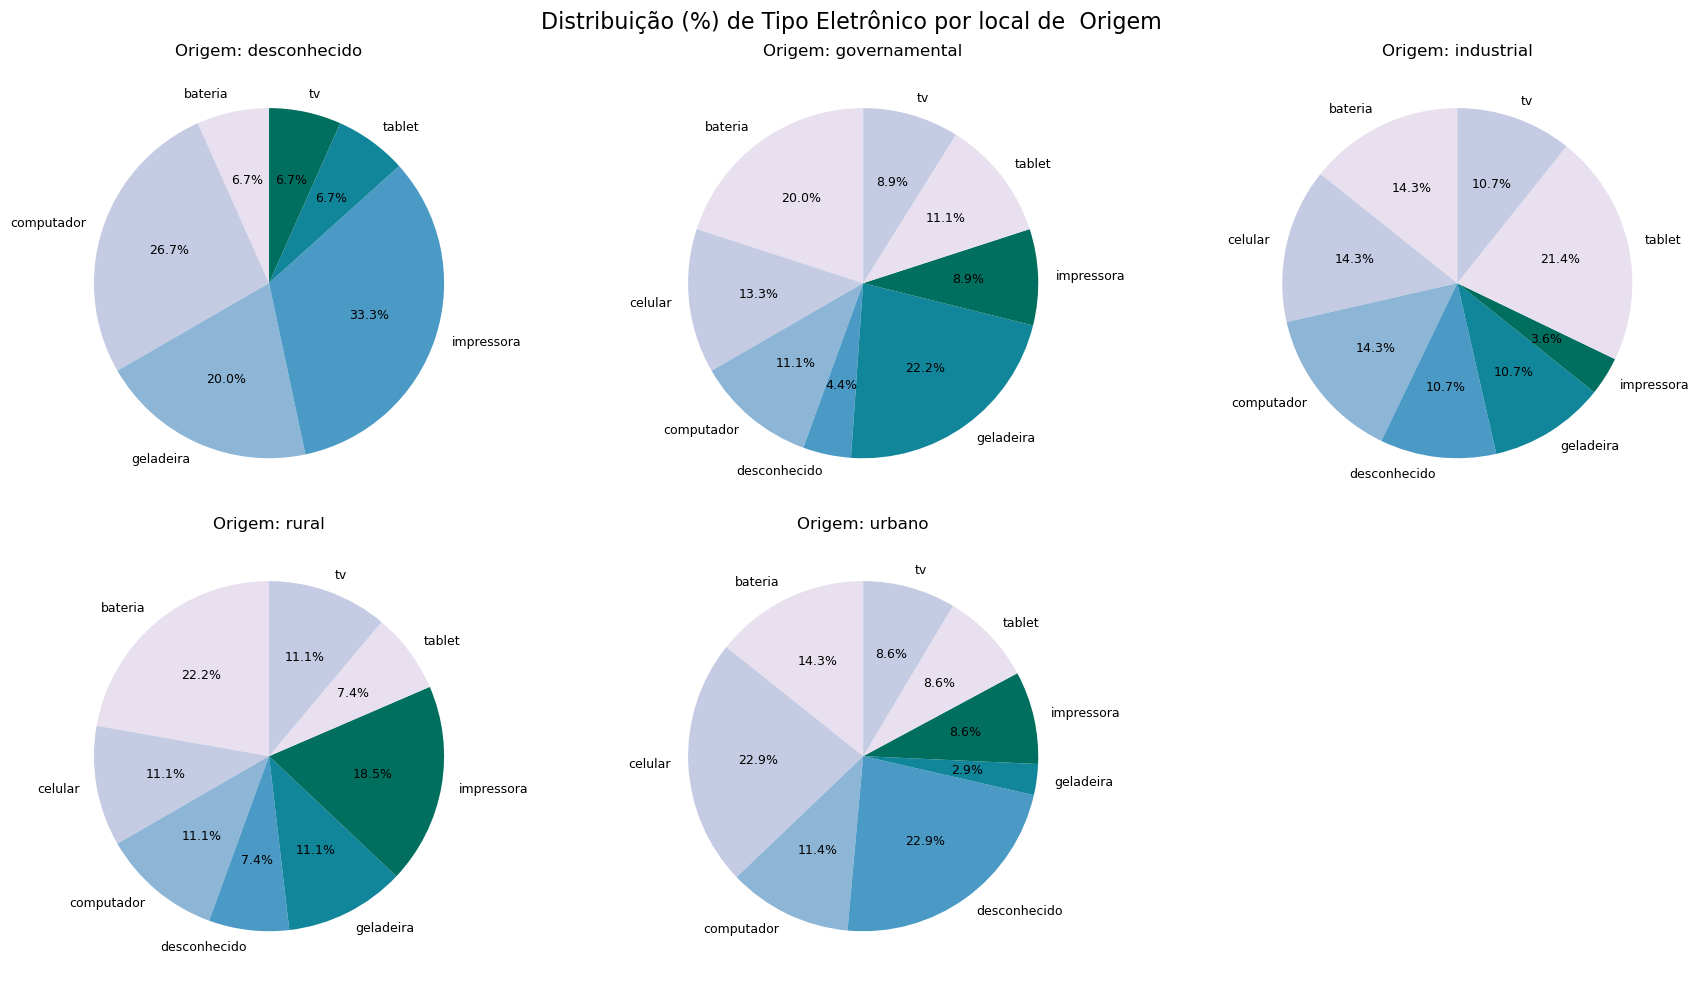

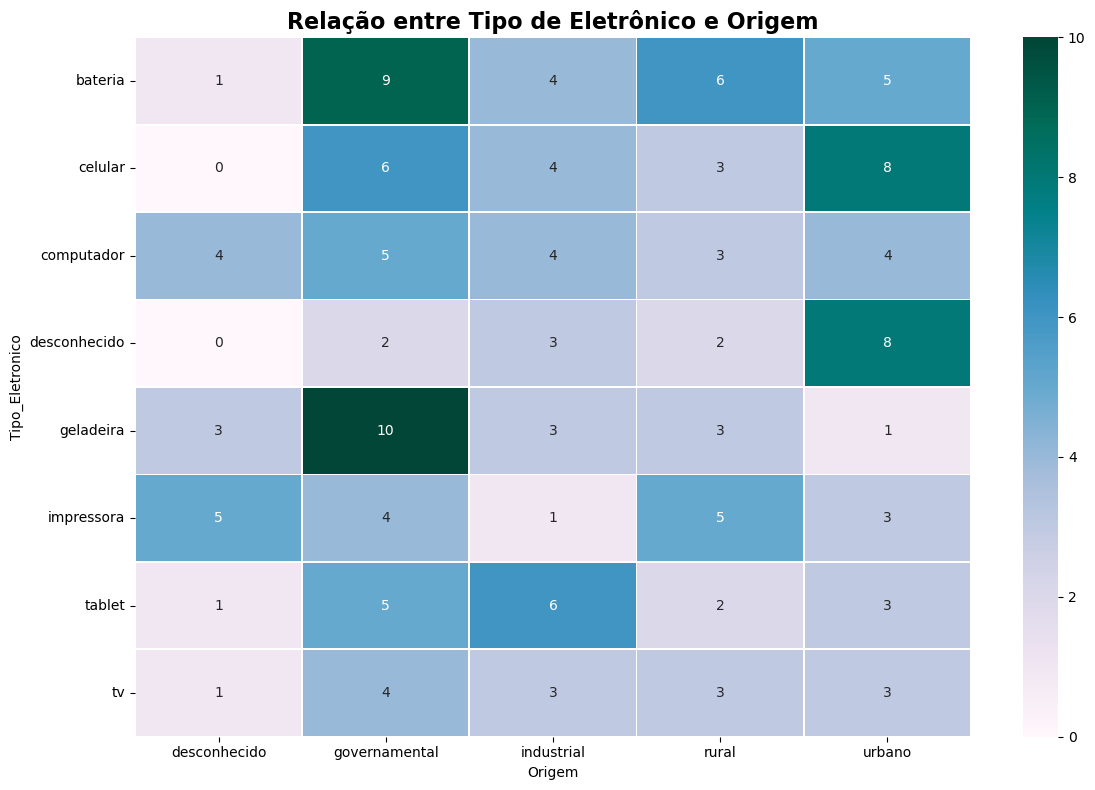

In [11]:
# Agrupamento: Tipo x Origem
print("=" * 50)
print("ANÁLISE CRUZADA - TIPO x ORIGEM")
print("=" * 50)

# Cruzamento entre Tipo_Eletronico e Origem
cruzamento = df.groupby(['Tipo_Eletronico', 'Origem']).size().unstack(fill_value=0)
print("Tabela de Contingência:")
print(cruzamento)
print("\n")

#Transpondo a matriz a grupada para plotagem 
pivot=cruzamento.T
n = len(pivot.index)

# Definir grade 2x3 (até 6 subplots)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
ax = axes.flatten()  
color = sns.color_palette('PuBuGn')

for i, origem in enumerate(pivot.index):
    valores = pivot.loc[origem]
    
    # Remove categorias com valor 0 para evitar poluição
    valores = valores[valores > 0]
    
    wedges, texts, autotexts = ax[i].pie(
        valores,
        labels=valores.index,  # Remove labels dentro da pizza
        autopct='%1.1f%%',
        startangle=90,
        colors=color[:len(valores)],
        textprops={'fontsize': 9}  # Ajusta tamanho do texto
    )
    
    # Título da subplot
    ax[i].set_title(f'Origem: {origem}', fontsize=12)

# Remove eixos extras se sobrar espaço
for j in range(n, 6):
    fig.delaxes(ax[j])

# Título geral
plt.suptitle('Distribuição (%) de tipo Eletrônico por local de  Origem ', fontsize=16)
plt.tight_layout()
plt.show()

df.groupby('Origem')['Tipo_Eletronico'].nunique()


# # Heatmap da análise cruzada
# plt.figure(figsize=(12, 8))
# sns.heatmap(cruzamento, annot=True, fmt='d', cmap='PuBuGn', linewidths=0.5)
# plt.title('Relação entre Tipo de Eletrônico e Origem', fontsize=16, fontweight='bold')
# plt.tight_layout()
# plt.show()


## 4 – Análise Temporal de Descarte
Converta a coluna de data de descarte para o formato datetime, crie colunas adicionais como mês e ano, e produza gráficos de linha mostrando a evolução mensal do volume de descartes

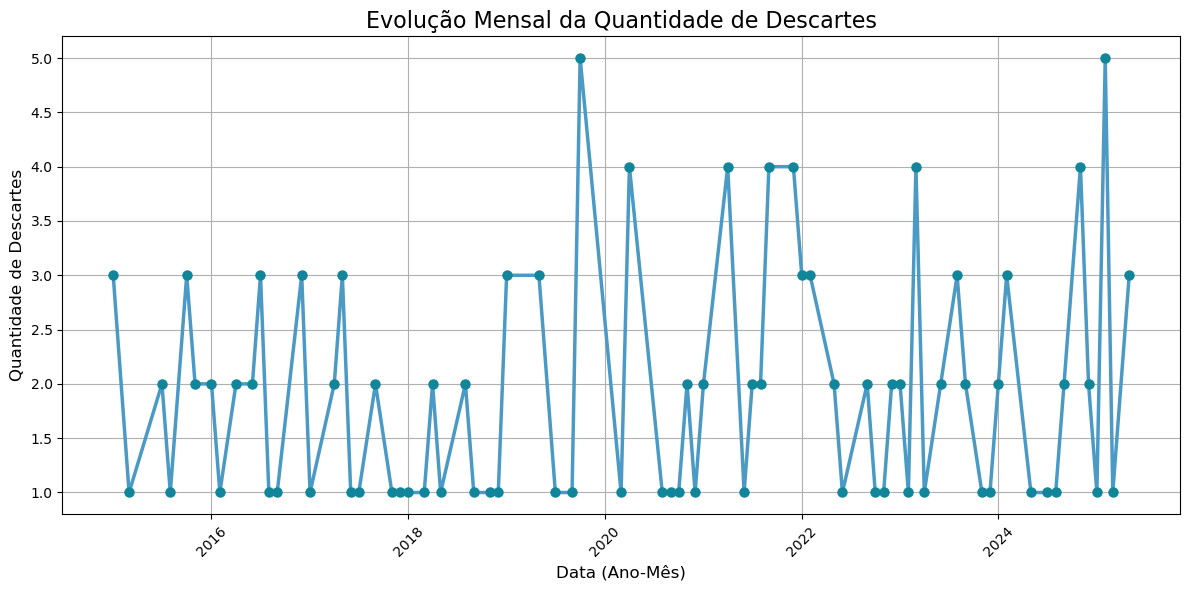

In [13]:
df['Data_Descarte']
df['Data_Descarte'] = pd.to_datetime(df['Data_Descarte'], errors='coerce')
df['Ano'] = df['Data_Descarte'].dt.year
df['Mes'] = df['Data_Descarte'].dt.month
df['Mes_Ano'] = df['Data_Descarte'].dt.to_period('M')

descartes_mensais = df.groupby([df['Data_Descarte'].dt.to_period('M')]).size().reset_index(name='volume_descartes')
descartes_mensais['Data_Descarte'] = descartes_mensais['Data_Descarte'].dt.to_timestamp()

# Configure a visualização
plt.figure(figsize=(12, 6))

# grafico de linha
plt.plot(descartes_mensais['Data_Descarte'].values, 
         descartes_mensais['volume_descartes'].values, 
         marker='o', 
         linestyle='-', 
         color=color[3], 
         linewidth=2.5,
         markersize=6,
         markerfacecolor=color[4],
         markeredgecolor=color[4],
         markeredgewidth=1.5)

# Adicione título e rótulos
plt.title('Evolução Mensal da Quantidade de Descartes', fontsize=16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Quantidade de Descartes', fontsize=12)
plt.xticks(rotation=45) # Rotaciona os rótulos do eixo X para melhor visualização
plt.grid(True)
plt.tight_layout() # Ajusta o layout para evitar sobreposição

# Exiba o gráfico
plt.show()


## 5 – Agregação por Município
Utilize groupby para agregar os dados por município, calculando:
* o total de resíduos descartados(quantos resíduos foram descartados);
* a média de peso dos eletrônicos;
* a proporção de destinos formais ('aterro controlado', 'cooperativa', 'reciclagem formal') em relação aos informais ('lixão',
       'Desconhecido', 'rio');

Apresente os resultados em uma tabela ordenada e em gráfico de barras horizontais.



In [15]:
# definição dos destinos
destinos_formais = ['aterro controlado', 'cooperativa', 'reciclagem formal']
destinos_informais = ['lixão', 'desconhecido', 'rio']

# 2. AGRUPAR POR MUNICÍPIO E CALCULAR AS MÉTRICAS
agrupamento_municipio = df.groupby('Municipio').agg(
    Total_Residuos=('ID_Registro', 'count'),  # Quantidade de resíduos descartados
    Media_Peso=('Peso_kg', 'mean')          # Média de peso dos eletrônicos
).reset_index()


# Agrupar muncipios e destino do lixo 
destinos_counts = df.groupby(['Municipio', 'Destino_Final']).size().unstack(fill_value=0)

# somar totais de formais e informais
destinos_counts['Formais'] = destinos_counts[destinos_formais].sum(axis=1)
destinos_counts['Informais'] = destinos_counts[destinos_informais].sum(axis=1)

# calcular proporção
destinos_counts['Proporcao_Formais'] = destinos_counts['Formais'] / (destinos_counts['Formais'] + destinos_counts['Informais'])
#display(destinos_counts)

agrupamento_completo = agrupamento_municipio.merge(
    destinos_counts[['Formais', 'Informais', 'Proporcao_Formais']],
    left_on='Municipio', right_index=True, how='left'
)

agrupamento_sort_proporcao=agrupamento_completo.sort_values('Proporcao_Formais', ascending=False)
display(agrupamento_completo)


# # 6. APRESENTAR TABELA
print("📊 RESUMO POR MUNICÍPIO")
print("=" * 100)
print(f"{'Município':<20} {'Qtd Resíduos':<12} {'Média Peso (kg)':<15} {'Formais':<8} {'Informais':<10} {'% Formais':<12}")
print("-" * 100)

for _, row in agrupamento_sort_proporcao.iterrows():
    print(f"{row['Municipio']:<20} {row['Total_Residuos']:<12} {row['Media_Peso']:<15.2f} "
          f"{row['Formais']:<8} {row['Informais']:<10} {row['Proporcao_Formais']:<12.1%}")

print("=" * 100)
print(f"Total de municípios: {len(agrupamento_sort_proporcao)}")
print(f"Total geral de resíduos: {agrupamento_sort_proporcao['Total_Residuos'].sum():,}")
print(f"Proporção média de destinos formais: {agrupamento_sort_proporcao['Proporcao_Formais'].mean():.1%}")

,Municipio,Total_Residuos,Media_Peso,Formais,Informais,Proporcao_Formais
0,Abaetetuba,4,32.955000,3,1,0.750000
1,Alenquer,4,20.465000,2,2,0.500000
2,Altamira,4,28.537500,1,3,0.250000
3,Ananindeua,17,25.557647,6,11,0.352941
4,Barcarena,3,11.913333,3,0,1.000000
5,Belém,24,22.549167,8,16,0.333333
6,Bragança,1,47.840000,1,0,1.000000
7,Breves,4,35.817500,1,3,0.250000
8,Cametá,8,28.093750,4,4,0.500000
9,Capanema,2,21.160000,0,2,0.000000


📊 RESUMO POR MUNICÍPIO
Município            Qtd Resíduos Média Peso (kg) Formais  Informais  % Formais   
----------------------------------------------------------------------------------------------------
Igarapé-Miri         1            4.23            1        0          100.0%      
Bragança             1            47.84           1        0          100.0%      
Redenção             2            14.23           2        0          100.0%      
Mocajuba             1            24.18           1        0          100.0%      
Barcarena            3            11.91           3        0          100.0%      
Dom Eliseu           4            18.89           4        0          100.0%      
Abaetetuba           4            32.95           3        1          75.0%       
Tucuruí              3            31.36           2        1          66.7%       
Castanhal            12           26.87           8        4          66.7%       
Novo Progresso       3            8.63        

In [16]:
#plt.figure(figsize=(14, 10))
top_residuos = agrupamento_completo.sort_values('Total_Residuos', ascending=False)

top_residuos.head(10)

,Municipio,Total_Residuos,Media_Peso,Formais,Informais,Proporcao_Formais
5,Belém,24,22.549167,8,16,0.333333
3,Ananindeua,17,25.557647,6,11,0.352941
22,Santarém,16,28.727500,7,9,0.437500
11,Castanhal,12,26.868333,8,4,0.666667
15,Marabá,12,26.770833,7,5,0.583333
8,Cametá,8,28.093750,4,4,0.500000
20,Parauapebas,7,23.597143,4,3,0.571429
24,Tailândia,5,33.116000,3,2,0.600000
14,Itaituba,4,22.042500,1,3,0.250000
1,Alenquer,4,20.465000,2,2,0.500000


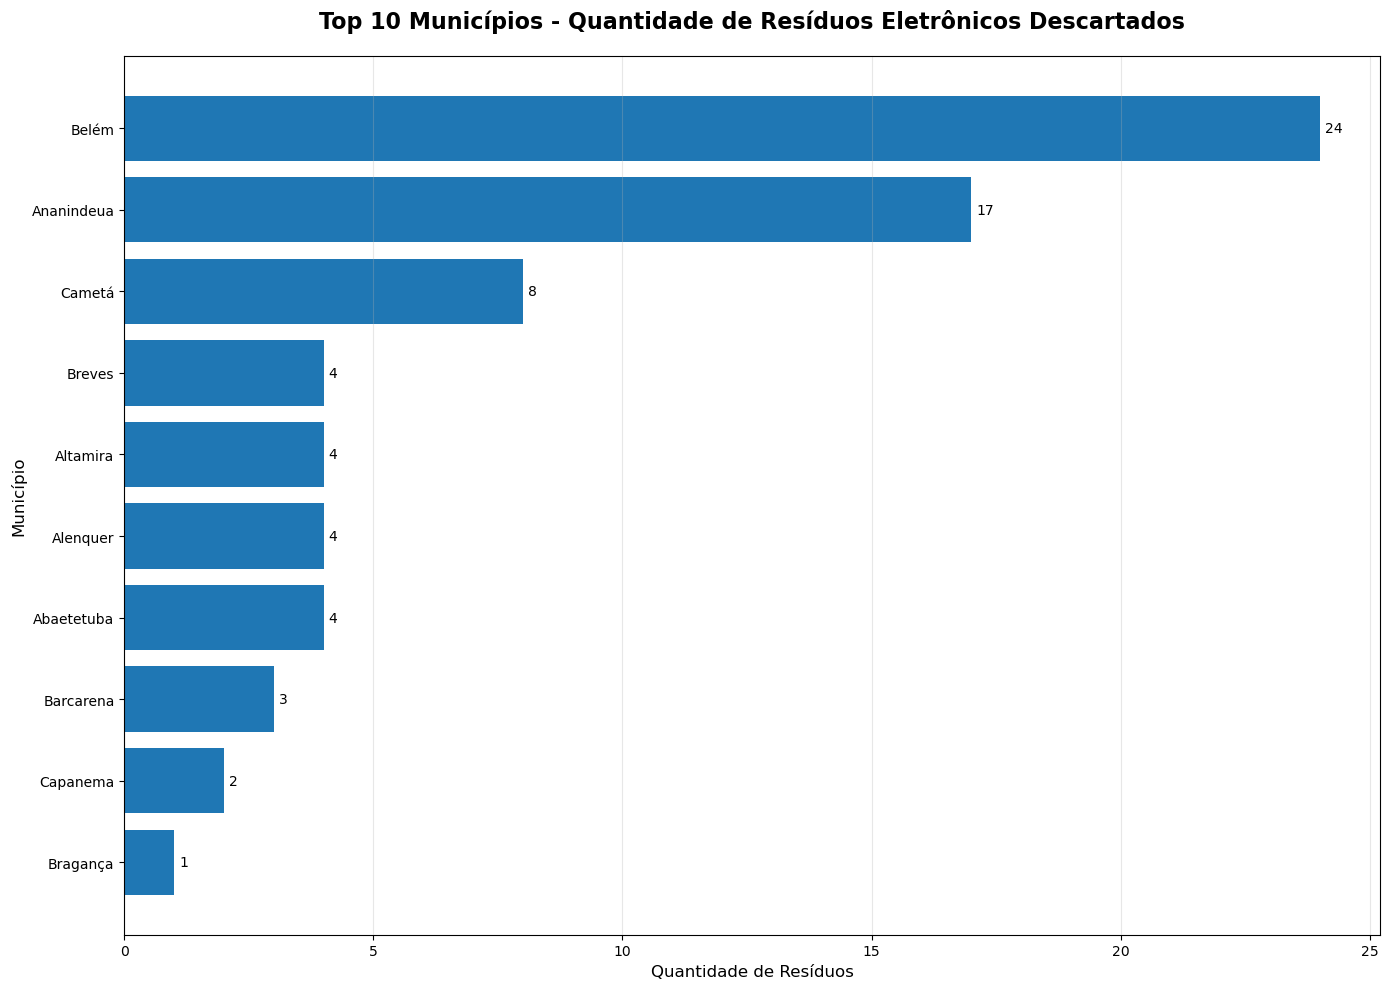

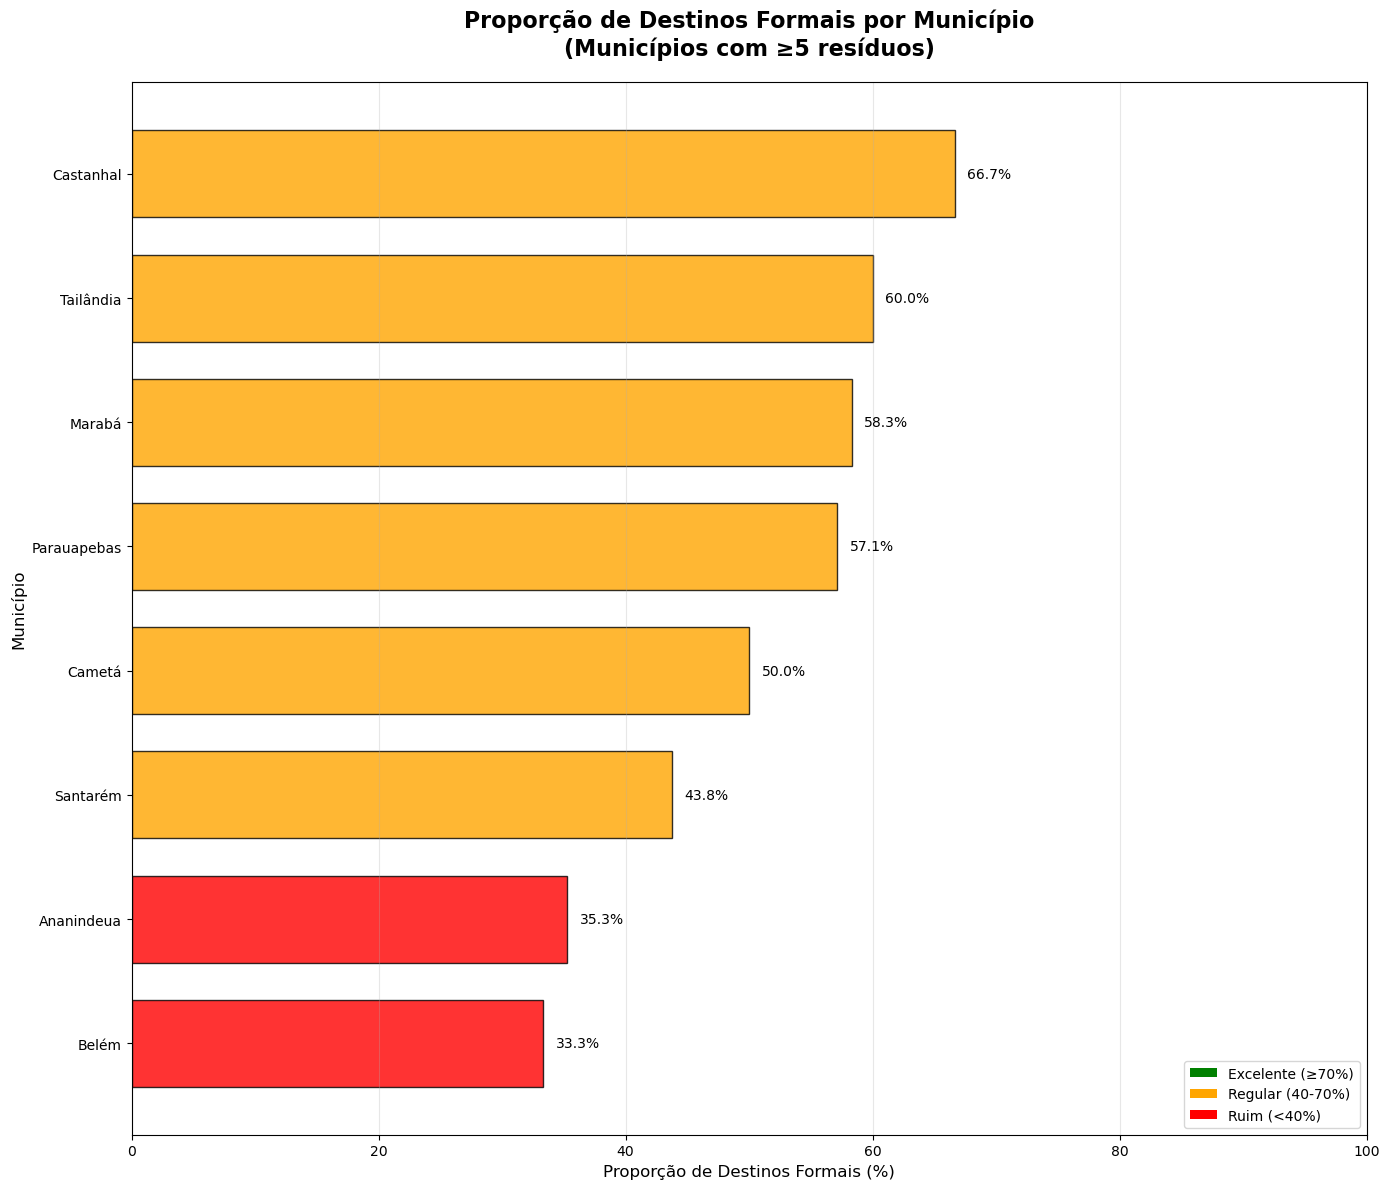

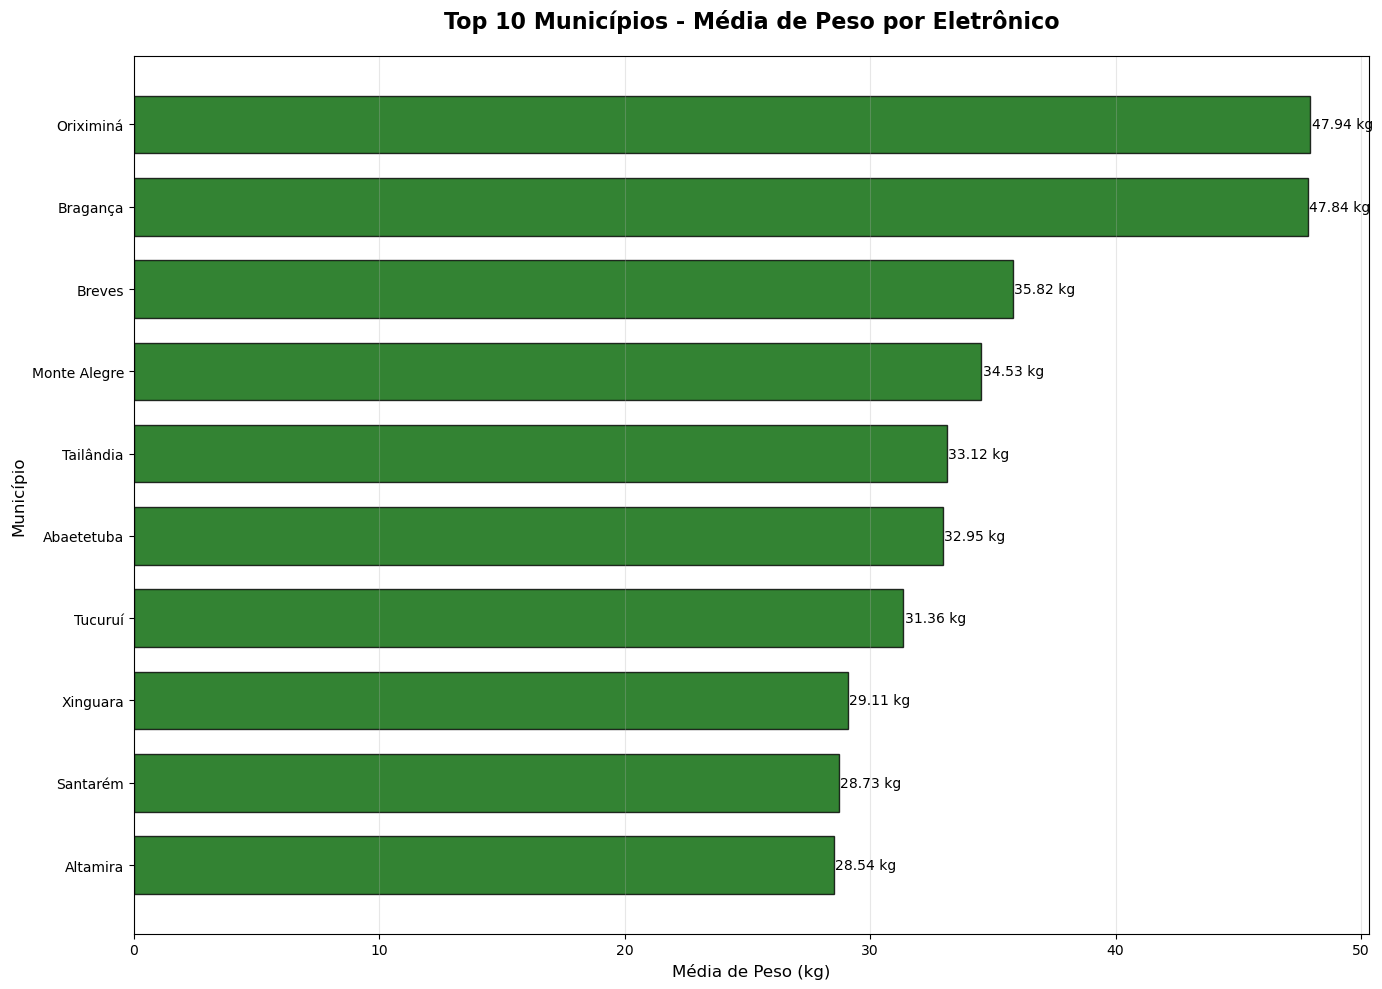

In [17]:
# Quantidade de resíduos por município (top 10)
top_10_residuos = agrupamento_completo.head(10).sort_values('Total_Residuos', ascending=True)
plt.figure(figsize=(14, 10))
bars = plt.barh(top_10_residuos['Municipio'], top_10_residuos['Total_Residuos'])
plt.title('Top 10 Municípios - Quantidade de Resíduos Eletrônicos Descartados', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Quantidade de Resíduos', fontsize=12)
plt.ylabel('Município', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{width:.0f}', ha='left', va='center')

plt.tight_layout()
plt.show()

# Proporção de destinos formais (todos os municípios com pelo menos 10 resíduos)
plt.figure(figsize=(14, 12))
municipios_significativos = agrupamento_completo[agrupamento_completo['Total_Residuos'] >=5] # Filtrar municípios com pelo menos 5 registros para ter dados significativos

municipios_ordenados = municipios_significativos.sort_values('Proporcao_Formais', ascending=True)

# Definir escala de cor
colors = []
for proporcao in municipios_ordenados['Proporcao_Formais']:
    if proporcao >= 0.7:
        colors.append('green')       # Excelente (>70%)
    elif proporcao >= 0.4:
        colors.append('orange')      # Regular (40-70%)
    else:
        colors.append('red')         # Ruim (<40%)

bars = plt.barh(municipios_ordenados['Municipio'], municipios_ordenados['Proporcao_Formais'] * 100, 
                color=colors, edgecolor='black', alpha=0.8, height=0.7)
plt.title('Proporção de Destinos Formais por Município\n(Municípios com ≥5 resíduos)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Proporção de Destinos Formais (%)', fontsize=12)
plt.ylabel('Município', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.xlim(0, 100)

# Adicionar valores e legendas de cores
for bar, proporcao in zip(bars, municipios_ordenados['Proporcao_Formais']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}%', ha='left', va='center')

# Adicionar legenda de cores
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', label='Excelente (≥70%)'),
    Patch(facecolor='orange', label='Regular (40-70%)'),
    Patch(facecolor='red', label='Ruim (<40%)')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

# Gráfico 3: Média de peso por município (top 10)
plt.figure(figsize=(14, 10))
top_10_peso = agrupamento_completo.nlargest(10, 'Media_Peso').sort_values('Media_Peso', ascending=True)

bars = plt.barh(top_10_peso['Municipio'], top_10_peso['Media_Peso'], 
                color='darkgreen', edgecolor='black', alpha=0.8, height=0.7)
plt.title('Top 10 Municípios - Média de Peso por Eletrônico', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Média de Peso (kg)', fontsize=12)
plt.ylabel('Município', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f} kg', ha='left', va='center')

plt.tight_layout()
plt.show()


## 6-Cruzamento entre Tipo de Eletrônico e Destino
Crie uma tabela cruzada (crosstab ou pivot_table) relacionando o tipo de eletrônico com seu destino. Visualize os resultados em um heatmap (Seaborn), destacando quais combinações são mais críticas

In [ ]:
#df['Tipo_Eletronico'].unique()
#df['Destino_Final'].unique()
# destinos_formais = ['aterro controlado', 'cooperativa', 'reciclagem formal']
# destinos_informais = ['lixão', 'Desconhecido', 'rio']
df['Nivel_Toxico'].unique()

In [ ]:
# tabela cruzada
tabela_cruzada = pd.crosstab(
    df['Tipo_Eletronico'],
    df['Destino_Final'],
    margins=True,
    margins_name='Total'
)
display(tabela_cruzada)

#plt.figure(figsize=(16, 12))

# Criar subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))

# Heatmap 1: Tipo de eletronico x Destino final
heatmap1 = sns.heatmap(
    tabela_cruzada.iloc[:-1, :-1],
    annot=True,
    fmt='d',
    cmap='PuBuGn',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Quantidade de Descarte'},
    square=False,
    ax=ax1
)
ax1.set_title('QUANTIDADE: Tipo de Eletrônico vs Destino Final',fontsize=16, pad=20)
ax1.set_xlabel('Destino Final', fontsize=12, fontweight='bold')
ax1.set_ylabel('Tipo de Eletrônico', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', rotation=0)


#avaliação de zonas críticas
mapeamento_toxicidade = {
    'baixo': 1,
    'médio': 2, 
    'alto': 3,
    'crítico': 4
}

toxicidade_media = df.groupby(['Tipo_Eletronico', 'Destino_Final'])['Nivel_Toxico_Num'].mean().unstack(fill_value=0)
toxicidade_media
plt.figure(figsize=(16, 12))

heatmap2 = sns.heatmap(
    toxicidade_media,
    annot=True,
    fmt='.2f',
    cmap='YlOrRd',  
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Nível Tóxico Médio (1=baixo, 4=crítico)'},
    square=False,
    vmin=1, vmax=4,  # Escala fixa baseada no mapeamento
    ax=ax2
)



plt.figure(figsize=(16, 12))

# Calcular risco total = quantidade × toxicidade média
risco_total = tabela_cruzada.iloc[:-1, :-1].copy().astype(float)
risco_total = tabela_cruzada.iloc[:-1, :-1] * toxicidade_media

heatmap3 = sns.heatmap(
    risco_total,
    annot=True,
    fmt='.1f',
    cmap='Reds',  # Vermelho para risco
    linewidths=0.5,
    linecolor='black',
    cbar_kws={'label': 'Índice de Risco Total (Quantidade × Toxicidade)'},
    square=False
)

In [ ]:
destinos_informais  = ['lixão', 'rio', 'Desconhecido']

criticidade_avancada = []
for tipo in tabela_cruzada.index[:-1]:
    total_tipo = tabela_cruzada.loc[tipo, 'Total']
    problematicos = sum([tabela_cruzada.loc[tipo, dest] for dest in destinos_problematicos if dest in tabela_cruzada.columns])
    proporcao_problematica = (problematicos / total_tipo) * 100 if total_tipo > 0 else 0
    
    # Calcular toxicidade média do tipo
    toxicidade_media_tipo = df[df['Tipo_Eletronico'] == tipo]['Nivel_Toxico_Num'].mean()
    
    # Score de criticidade = (quantidade problemática) × (toxicidade média) × (proporção problemática)
    score_criticidade = problematicos * toxicidade_media_tipo * (proporcao_problematica / 100)
    
    criticidade_avancada.append({
        'Tipo_Eletronico': tipo,
        'Total': total_tipo,
        'Problematicos': problematicos,
        '%_Problematico': proporcao_problematica,
        'Toxicidade_Media': toxicidade_media_tipo,
        'Score_Criticidade': score_criticidade
    })


df_criticidade = pd.DataFrame(criticidade_avancada).sort_values('Score_Criticidade', ascending=False)

# CORREÇÃO: Calcular percentis APÓS ter todos os dados
scores = df_criticidade['Score_Criticidade'].values
if len(scores) > 0:
    p25 = np.percentile(scores, 25)
    p75 = np.percentile(scores, 75)
    
    # Adicionar prioridade baseada nos percentis
    df_criticidade['Prioridade'] = df_criticidade['Score_Criticidade'].apply(
        lambda x: 'ALTA' if x > p75 else 'MÉDIA' if x > p25 else 'BAIXA'
    )
else:
    df_criticidade['Prioridade'] = 'BAIXA'

print(f"{'Tipo':<15} {'Total':>6} {'Probl':>6} {'%Probl':>7} {'Tox':>5} {'Score':>8} {'Prioridade':<10}")
print("-" * 65)
for _, row in df_criticidade.iterrows():
    print(f"{row['Tipo_Eletronico']:<15} {row['Total']:>6} {row['Problematicos']:>6} "
          f"{row['%_Problematico']:>6.1f}% {row['Toxicidade_Media']:>5.2f} "
          f"{row['Score_Criticidade']:>8.1f} {row['Prioridade']:<10}")

print("=" * 65)


# 8. GRÁFICO DE DISPERSÃO - TOXICIDADE vs PROPORÇÃO PROBLEMÁTICA
# 8. GRÁFICO DE DISPERSÃO - TOXICIDADE vs PROPORÇÃO PROBLEMÁTICA (REVISADO)
plt.figure(figsize=(14, 10))

scatter = plt.scatter(
    df_criticidade['Toxicidade_Media'],
    df_criticidade['%_Problematico'],
    s=df_criticidade['Total']/5,  # Ajustei o divisor para melhor visualização
    c=df_criticidade['Score_Criticidade'],
    cmap='Reds',
    alpha=0.8,
    edgecolors='black',
    linewidth=0.5
)

# Adicionar labels com posicionamento inteligente
for i, row in df_criticidade.iterrows():
    plt.annotate(
        row['Tipo_Eletronico'], 
        (row['Toxicidade_Media'], row['%_Problematico']),
        xytext=(8, 8),  # Aumentei o offset
        textcoords='offset points',
        fontsize=10,
        fontweight='bold',
        alpha=0.9,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='none')
    )

plt.colorbar(scatter, label='Score de Criticidade', shrink=0.8)
plt.title('ANÁLISE DE RISCO: Toxicidade vs Proporção de Destinos Problemáticos\n(Tamanho = Quantidade Total, Cor = Score de Criticidade)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Toxicidade Média (1=baixo, 4=crítico)', fontsize=12)
plt.ylabel('Proporção de Destinos Problemáticos (%)', fontsize=12)
plt.grid(True, alpha=0.3)

# Adicionar quadrantes com posicionamento correto
plt.axhline(y=50, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
plt.axvline(x=2.5, color='red', linestyle='--', alpha=0.7, linewidth=1.5)

# Posicionar textos dos quadrantes de forma dinâmica
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

# Calcular posições relativas
quadrante_x1 = x_min + (2.5 - x_min) * 0.3  # 30% da distância no 1º quadrante
quadrante_x2 = 2.5 + (x_max - 2.5) * 0.3    # 30% da distância no 2º quadrante
quadrante_y = y_min + (y_max - y_min) * 0.8  # 80% da altura

plt.text(quadrante_x1, quadrante_y, 'ALTA PRIORIDADE\n(Alta % problemática)', 
         fontweight='bold', ha='center', va='center', fontsize=10,
         bbox=dict(facecolor='yellow', alpha=0.3, boxstyle='round,pad=1'))

plt.text(quadrante_x2, quadrante_y, 'CRÍTICO\n(Alta toxicidade + alta %)', 
         fontweight='bold', ha='center', va='center', fontsize=10, color='red',
         bbox=dict(facecolor='red', alpha=0.2, boxstyle='round,pad=1'))

# Ajustar limites para melhor visualização
plt.xlim(max(0.5, x_min), min(4.5, x_max))  # Toxicidade entre 1-4
plt.ylim(-5, 105)  # Percentual entre 0-100%

# Adicionar legenda de tamanho (opcional)
if len(df_criticidade) > 0:
    # Criar legenda para os tamanhos
    sizes = [df_criticidade['Total'].min(), df_criticidade['Total'].median(), df_criticidade['Total'].max()]
    labels = [f'{int(s)} resíduos' for s in sizes]
    
    # Plotar pontos invisíveis para a legenda
    for size, label in zip(sizes, labels):
        plt.scatter([], [], s=size/5, alpha=0.8, label=label, color='gray', edgecolors='black')
    
    plt.legend(scatterpoints=1, frameon=True, labelspacing=1.5, title='Tamanho = Quantidade Total',
               loc='lower right', bbox_to_anchor=(1, 0))

plt.tight_layout()
plt.show()

In [ ]:
# 9. TOP 10 COMBINAÇÕES MAIS PERIGOSAS
print("\n☣️  TOP 10 COMBINAÇÕES MAIS PERIGOSAS")
print("=" * 80)

combinations_risk = []
for tipo in toxicidade_media.index:
    for destino in toxicidade_media.columns:
        if destino in destinos_problematicos:
            quantidade = tabela_cruzada.loc[tipo, destino]
            tox = toxicidade_media.loc[tipo, destino]
            risco = quantidade * tox
            if risco > 0:
                combinations_risk.append({
                    'Combinação': f"{tipo} → {destino}",
                    'Quantidade': quantidade,
                    'Toxicidade': tox,
                    'Risco_Total': risco
                })

top_perigosas = pd.DataFrame(combinations_risk).nlargest(10, 'Risco_Total')

plt.figure(figsize=(14, 8))
bars = plt.barh(top_perigosas['Combinação'], top_perigosas['Risco_Total'], 
                color='darkred', alpha=0.8, edgecolor='black')

plt.title('TOP 10 COMBINAÇÕES MAIS PERIGOSAS\n(Risco Total = Quantidade × Toxicidade)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Índice de Risco Total')
plt.ylabel('Combinação Tipo → Destino')
plt.grid(axis='x', alpha=0.3)

# Adicionar valores e informações extras
for i, (bar, row) in enumerate(zip(bars, top_perigosas.iterrows())):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}\n({int(row[1]["Quantidade"])} un × {row[1]["Toxicidade"]:.1f} tox)',
             va='center', fontweight='bold')

plt.tight_layout()
plt.show()


## 7-Impacto do Peso dos Resíduos no Meio Ambiente
1-Utilize describe()
2-métodos de visualização (boxplot e histplot) para analisar a distribuição do peso dos resíduos eletrônicos.
3-Identifique outliers e discuta possíveis explicações para sua ocorrência.
4- faça uma comparação da média e do desvio padrão de peso entre descartes destinados formalmente e informalmente, apresentando os resultados em gráfico de violino.


In [ ]:


# 1. ANÁLISE DESCRITIVA DA DISTRIBUIÇÃO DE PESO
print("📊 ANÁLISE DESCRITIVA - PESO DOS RESÍDUOS ELETRÔNICOS (kg)")
print("=" * 60)
print(df['Peso_kg'].describe().round(2))
print("=" * 60)


# # 2. IDENTIFICAÇÃO DE OUTLIERS
Q1 = df['Peso_kg'].quantile(0.25)
Q3 = df['Peso_kg'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

outliers = df[(df['Peso_kg'] > limite_superior) | (df['Peso_kg'] < limite_inferior)]
print(f"\n🔍 DETECÇÃO DE OUTLIERS:")
print(f"• Limite inferior: {limite_inferior:.2f} kg")
print(f"• Limite superior: {limite_superior:.2f} kg")
print(f"• Número de outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}% dos dados)")
print(f"• Peso máximo encontrado: {df['Peso_kg'].max():.2f} kg")
print(f"• Peso mínimo encontrado: {df['Peso_kg'].min():.2f} kg")



In [ ]:
#visualização das distribuições 
# Figura com múltiplos gráficos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ANÁLISE DA DISTRIBUIÇÃO DE PESO DOS RESÍDUOS ELETRÔNICOS', 
             fontsize=16, fontweight='bold')

# Boxplot com Seaborn
sns.boxplot(y=df['Peso_kg'], ax=ax1, color='lightblue')
ax1.set_title('Boxplot - Distribuição de Peso', fontweight='bold')
ax1.set_ylabel('Peso (kg)')
ax1.axhline(limite_superior, color='red', linestyle='--', alpha=0.7, label='Limite Outliers')
ax1.axhline(limite_inferior, color='red', linestyle='--', alpha=0.7)
ax1.legend()

# Histograma com Seaborn
sns.histplot(data=df, x='Peso_kg', bins=30, ax=ax2, color='skyblue', 
             edgecolor='black', alpha=0.7, kde=False)
ax2.set_title('Histograma - Distribuição de Frequência', fontweight='bold')
ax2.set_xlabel('Peso (kg)')
ax2.set_ylabel('Frequência')
ax2.axvline(df['Peso_kg'].mean(), color='green', linestyle='-', label=f'Média: {df["Peso_kg"].mean():.2f} kg')
ax2.axvline(df['Peso_kg'].median(), color='orange', linestyle='-', label=f'Mediana: {df["Peso_kg"].median():.2f} kg')
ax2.legend()

# ECDF - Empirical Cumulative Distribution Function (alternativa ao KDE)
sorted_pesos = np.sort(df['Peso_kg'])
y = np.arange(1, len(sorted_pesos) + 1) / len(sorted_pesos)
ax3.plot(sorted_pesos, y, marker='.', linestyle='none', alpha=0.5, color='purple')
ax3.set_title('Função de Distribuição Acumulada (ECDF)', fontweight='bold')
ax3.set_xlabel('Peso (kg)')
ax3.set_ylabel('Probabilidade Acumulada')
ax3.grid(True, alpha=0.3)

# Violin plot da distribuição completa
sns.violinplot(y=df['Peso_kg'], ax=ax4, color='lightgreen', inner='quartile')
ax4.set_title('Violin Plot - Densidade de Probabilidade', fontweight='bold')
ax4.set_ylabel('Peso (kg)')

plt.tight_layout()
plt.show()

# 4. ANÁLISE DOS OUTLIERS
if len(outliers) > 0:
    print("\n🔎 ANÁLISE DETALHADA DOS OUTLIERS:")
    print(f"📋 Distribuição dos Outliers por Tipo:")
    print(outliers['Tipo_Eletronico'].value_counts())
    
    print(f"\n🎯 Destino dos Outliers:")
    print(outliers['Destino_Final'].value_counts())
    
    # Gráfico de outliers por tipo com Seaborn
    plt.figure(figsize=(12, 6))
    sns.barplot(data=outliers, x='Tipo_Eletronico', y='Peso_kg', estimator=max, 
                errorbar=None, palette='Reds')
    plt.title('Maiores Outliers por Tipo de Eletrônico', fontweight='bold')
    plt.xlabel('Tipo de Eletrônico')
    plt.ylabel('Peso Máximo (kg)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 5. COMPARAÇÃO FORMAL vs INFORMAL

# Definir destinos
destinos_formais = ['aterro controlado', 'cooperativa', 'reciclagem formal']
destinos_informais = ['lixão', 'Desconhecido', 'rio']

df['Destino_Categoria'] = np.where(
    df['Destino_Final'].isin(destinos_formais), 'Formal', 
    np.where(df['Destino_Final'].isin(destinos_informais), 'Informal', 'Outros')
)

# Filtrar apenas Formal e Informal
df_comparacao = df[df['Destino_Categoria'].isin(['Formal', 'Informal'])]

# Estatísticas comparativas
print(f"\n📊 COMPARAÇÃO FORMAL vs INFORMAL:")
stats_comparacao = df_comparacao.groupby('Destino_Categoria')['Peso_kg'].agg(['mean', 'std', 'count', 'median'])
print(stats_comparacao.round(2))

# 6. GRÁFICO DE VIOLINO COMPARATIVO
plt.figure(figsize=(12, 8))

# Violin plot comparativo
sns.violinplot(data=df_comparacao, x='Destino_Categoria', y='Peso_kg',
               palette={'Formal': 'lightgreen', 'Informal': 'lightcoral'},
               inner='quartile', cut=0)

# Adicionar pontos das médias
means = df_comparacao.groupby('Destino_Categoria')['Peso_kg'].mean()
for i, (categoria, mean_val) in enumerate(means.items()):
    plt.scatter(i, mean_val, color='yellow', s=100, zorder=5, 
                edgecolors='black', label='Média' if i == 0 else "")

plt.title('COMPARAÇÃO DE PESO: Destino Formal vs Informal', fontsize=14, fontweight='bold')
plt.xlabel('Categoria de Destino')
plt.ylabel('Peso (kg)')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 7. GRÁFICO DE CAIXA COMPARATIVO
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_comparacao, x='Destino_Categoria', y='Peso_kg',
            palette={'Formal': 'lightgreen', 'Informal': 'lightcoral'})
plt.title('Distribuição de Peso por Categoria de Destino', fontweight='bold')
plt.xlabel('Categoria de Destino')
plt.ylabel('Peso (kg)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 8. GRÁFICO DE SWARM PLOT (para visualizar pontos individuais)
plt.figure(figsize=(10, 8))
sns.swarmplot(data=df_comparacao, x='Destino_Categoria', y='Peso_kg',
              palette={'Formal': 'green', 'Informal': 'red'}, alpha=0.6, size=3)
sns.boxplot(data=df_comparacao, x='Destino_Categoria', y='Peso_kg',
            palette={'Formal': 'lightgreen', 'Informal': 'lightcoral'},
            boxprops=dict(alpha=0.3))
plt.title('Swarm Plot + Boxplot: Distribuição Detalhada', fontweight='bold')
plt.xlabel('Categoria de Destino')
plt.ylabel('Peso (kg)')
plt.tight_layout()
plt.show()

# 9. ANÁLISE ESTATÍSTICA
from scipy.stats import mannwhitneyu

formal_pesos = df_comparacao[df_comparacao['Destino_Categoria'] == 'Formal']['Peso_kg']
informal_pesos = df_comparacao[df_comparacao['Destino_Categoria'] == 'Informal']['Peso_kg']

# Teste não paramétrico (Mann-Whitney)
stat, p_value = mannwhitneyu(formal_pesos, informal_pesos)
print(f"\n📈 Teste de Mann-Whitney U:")
print(f"• Estatística U: {stat:.3f}")
print(f"• Valor-p: {p_value:.4f}")
print(f"• Diferença significativa? {'Sim' if p_value < 0.05 else 'Não'}")

# 10. GRÁFICO FINAL - COMPARAÇÃO COMPLETA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogramas sobrepostos
sns.histplot(data=df_comparacao[df_comparacao['Destino_Categoria'] == 'Formal'], 
             x='Peso_kg', ax=ax1, color='green', alpha=0.5, label='Formal', kde=False)
sns.histplot(data=df_comparacao[df_comparacao['Destino_Categoria'] == 'Informal'], 
             x='Peso_kg', ax=ax1, color='red', alpha=0.5, label='Informal', kde=False)
ax1.set_title('Histogramas Comparativos', fontweight='bold')
ax1.set_xlabel('Peso (kg)')
ax1.set_ylabel('Frequência')
ax1.legend()

# ECDF comparativo
for categoria, color in zip(['Formal', 'Informal'], ['green', 'red']):
    subset = df_comparacao[df_comparacao['Destino_Categoria'] == categoria]
    sorted_data = np.sort(subset['Peso_kg'])
    y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ax2.plot(sorted_data, y, marker='.', linestyle='none', alpha=0.7, 
             label=categoria, color=color)
ax2.set_title('ECDF Comparativo', fontweight='bold')
ax2.set_xlabel('Peso (kg)')
ax2.set_ylabel('Probabilidade Acumulada')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Análise completa concluída!")

## 8 – Relação entre Educação Ambiental e Destino do Resíduo